<a href="https://colab.research.google.com/github/SrvPioneer/Airbnb_Data_Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Neighbourhood groups with minimum number of nights to stay and people preferring which room type? </b>

![Airbnb](https://sm.pcmag.com/pcmag_in/news/a/airbnb-is-/airbnb-is-attempting-to-stop-disruptive-new-years-eve-partie_w6va.jpg)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project - EDA/Airbnb NYC 2019.csv')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#Dropping irrelevant column as last_review and reviews per month have much no. of null values thus cannot be used to pridict.
df.drop(['last_review','reviews_per_month'], axis = 1, inplace = True)

In [10]:
#Dropping null values from host_name and name
df.dropna(subset=['name', 'host_name'],inplace = True)

In [11]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,1,23


##1. What can we learn about different hosts and areas?

In [13]:
hosts_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()


In [28]:
hosts_areas = hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head()
hosts_areas

,host_name,neighbourhood_group,calculated_host_listings_count
13214,Sonder (NYC),Manhattan,106929
1833,Blueground,Manhattan,53360
7273,Kara,Manhattan,14669
13213,Sonder,Manhattan,9216
6538,Jeremy & Laura,Manhattan,9216


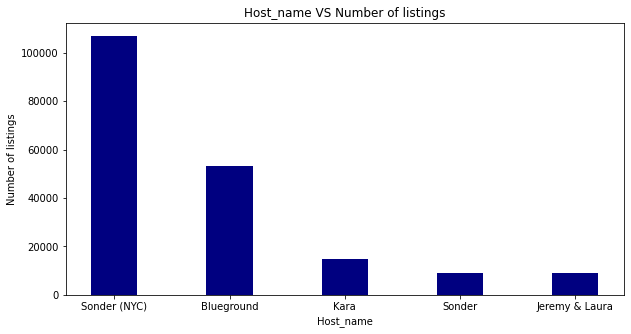

In [35]:
# Create a visualization between host_name and  calculated_host_listings_count
host_name = hosts_areas["host_name"]
number_of_listing = hosts_areas ["calculated_host_listings_count"]
fig = plt.figure(figsize = (10, 5))
plt.bar(host_name, number_of_listing, color ='navy',
        width = 0.4)
 
plt.xlabel("Host_name")
plt.ylabel("Number of listings")
plt.title("Host_name VS Number of listings")
plt.show()

As we can see most number of listings are from Manhattan created Sonder (NYC), Blueground, Kara

##2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [15]:
df[['neighbourhood_group','number_of_reviews']]

,neighbourhood_group,number_of_reviews
0,Brooklyn,9
1,Manhattan,45
2,Manhattan,0
3,Brooklyn,270
4,Manhattan,9
...,...,...
48890,Brooklyn,0
48891,Brooklyn,0
48892,Manhattan,0
48893,Manhattan,0


In [16]:
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,28334
1,Brooklyn,486174
2,Manhattan,454126
3,Queens,156902
4,Staten Island,11541


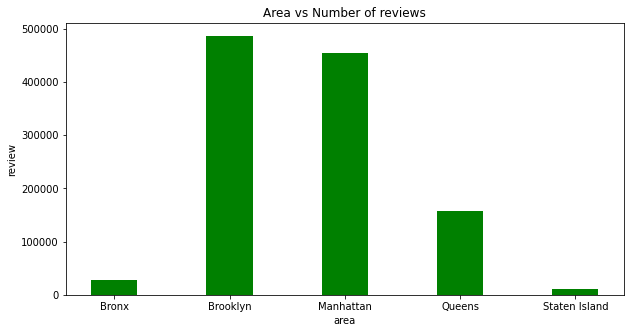

In [17]:
# Bar graph to show the no. of reviews for a particular area.

area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='green',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

From here we can say that Brooklyn is the most preferenced neighbourhood group and Staten island is the least one to stay.
Neighborhood with most number of reviews ,means that these neighbourhood has most number of customers.

In [18]:
price_area = df.groupby(['price'])['number_of_reviews'].sum().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,377
1,10,241
2,11,113
3,12,8
4,13,9


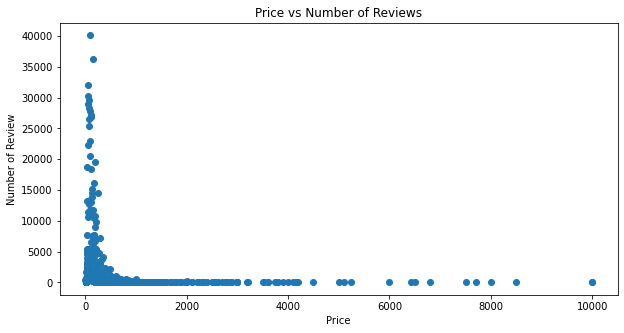

In [19]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the scatter plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

From the above Analysis we can say that most people prefer to stay in place where price is less.

##3. Which hosts are the busiest and why?

In [20]:
busiest_hosts = df.groupby(['host_name','room_type'])['number_of_reviews'].max().reset_index()

In [21]:
busiest_hosts_10 = busiest_hosts.sort_values(by = 'number_of_reviews',ascending = False).head(10)
busiest_hosts_10 

,host_name,room_type,number_of_reviews
3434,Dona,Private room,629
6332,Jj,Private room,607
8977,Maya,Private room,543
2164,Carol,Private room,540
2975,Danielle,Private room,510
1214,Asa,Entire home/apt,488
13839,Wanda,Private room,480
7902,Linda,Private room,474
2947,Dani,Entire home/apt,467
863,Angela,Private room,466


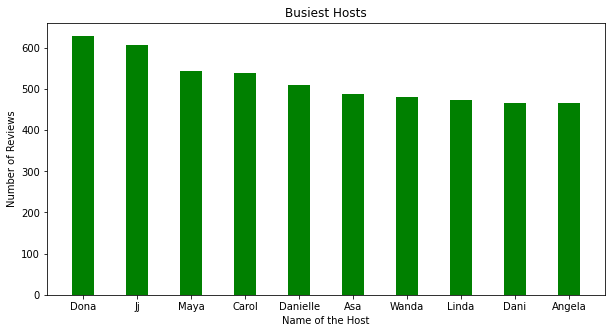

In [22]:
name = busiest_hosts_10['host_name']
reviews = busiest_hosts_10['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='green',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

Busiest Hosts are :
DONA > JI > MAYA > CAROL

Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

##4. Neighbourhood groups with minimum number of nights to stay and people preferring which room type?

In [23]:
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().reset_index()
traffic_areas = traffic_areas.sort_values(by='number_of_reviews', ascending=False)

In [24]:
traffic_areas_minimum_nights = df.groupby(['neighbourhood_group'])['minimum_nights'].sum().reset_index()
traffic_areas_minimum_nights = traffic_areas_minimum_nights.sort_values(by='minimum_nights', ascending=True)

<Figure size 720x360 with 0 Axes>

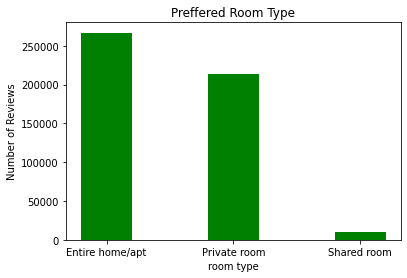

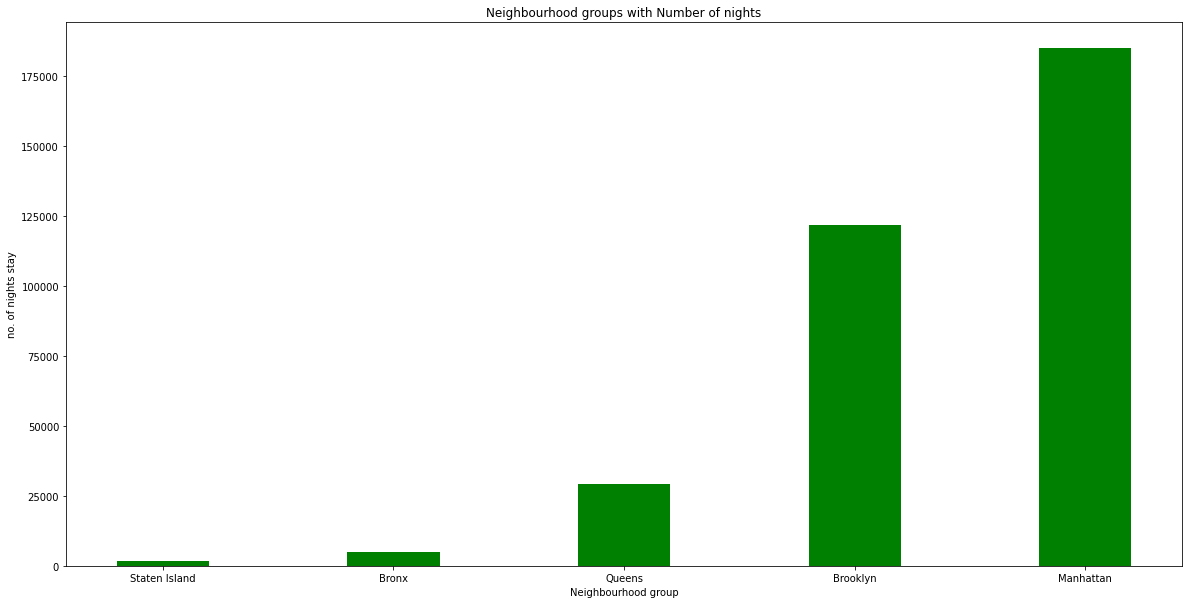

<Figure size 720x360 with 0 Axes>

In [25]:

plt.bar(traffic_areas['room_type'],traffic_areas['number_of_reviews'],color ='green', width = 0.4)
plt.title('Preffered Room Type')
plt.xlabel('room type')
plt.ylabel('Number of Reviews')
plt.figure(figsize=(20,10))

plt.bar(traffic_areas_minimum_nights['neighbourhood_group'],traffic_areas_minimum_nights['minimum_nights'],color ='green', width = 0.4)
plt.title('Neighbourhood groups with Number of nights')
plt.xlabel('Neighbourhood group')
plt.ylabel('no. of nights stay')
plt.figure(figsize=(10,5))

From the above analysis we can say that people are preferring Entire home/apt or private room which are present in Broklyn,Manhattan and Queens, and which are in less price.

##Conclusion:
1. From the above analysis we have found that Manhatten is the most preferred location of stay.
2. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
3. People prefer to stay in the places where the prices are less.
4. The places where there is more no. of reviews means more people are visiting there, it could be a tourist place.
